# Homework 3
## DS 3000: Foundation of Data Science
Name: Vivian Shu Yi Li <br>
NUID: 001506227 <br>
Date: June 11, 2023 <br>

In [1]:
# load libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from collections import Counter

In [2]:
# connecting to SQLite database
con = sqlite3.connect('genetics.db')

## Question 1
- how many gene-disease association were cataloged
- how many total papers were published between 1960 and the present year

In [3]:
# write the query
q1 = """select count(*) as n_association, sum(num_pubs) as n_publication, last_year as year 
        from disgenet 
        where last_year >= 1960
        group by last_year
        order by last_year"""

In [4]:
# connect & get df
df_count = pd.read_sql_query(q1, con)

# delete the unneccesary rows
df_count = df_count[(df_count['year'] != 'NA') & (df_count['year'] != 'last_year')]

# show df
df_count.head(10)

,n_association,n_publication,year
0,4,4.0,1962
1,2,2.0,1966
2,2,2.0,1967
3,3,3.0,1968
4,3,3.0,1969
5,4,4.0,1970
6,19,21.0,1971
7,19,21.0,1972
8,16,20.0,1973
9,52,52.0,1974


In [5]:
# find the total of association & publication
total_assoc = int(df_count['n_association'].sum())
total_pub = int(df_count['n_publication'].sum())

# print result
print("Total gene-disease associations:", total_assoc, "associations")
print("Total published papers:", total_pub, "publications")

Total gene-disease associations: 944583 associations
Total published papers: 2670570 publications


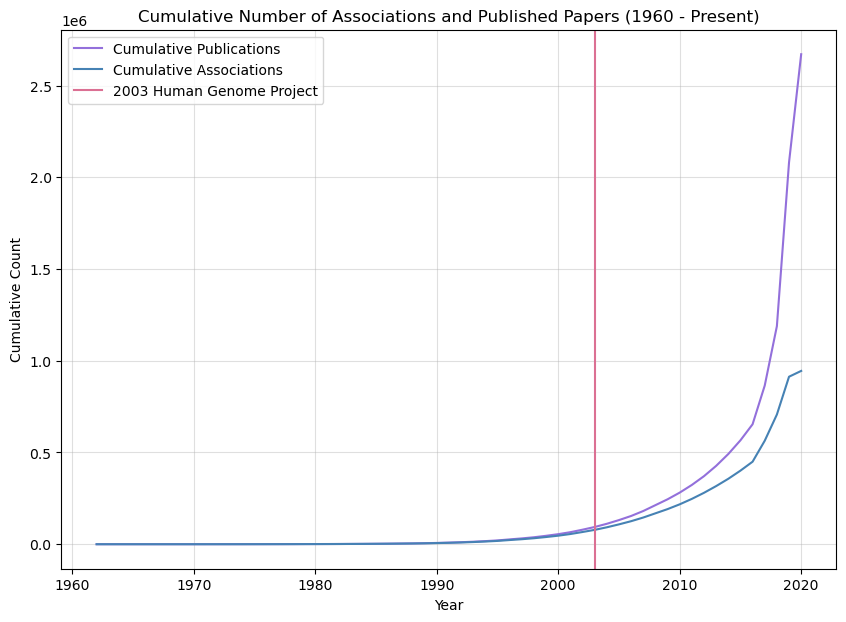

In [6]:
# plot cumulative total(using cumsum)
plt.figure(figsize=(10, 7))
plt.plot(df_count['year'], df_count['n_publication'].cumsum(), label='Cumulative Publications', color='mediumpurple')
plt.plot(df_count['year'], df_count['n_association'].cumsum(), label='Cumulative Associations', color='steelblue')
plt.axvline(x=2003, color='palevioletred', label='2003 Human Genome Project')

# label the plot
plt.xlabel('Year')
plt.ylabel('Cumulative Count')
plt.title('Cumulative Number of Associations and Published Papers (1960 - Present)')
plt.legend()
plt.grid(alpha=0.4)
plt.show()

### Human Genome Project
The Human Genome Project's 2003 completion led to a surge in gene-disease association research. As the years get closer to the present time, the cumulative number of publication increases.

As shown in the line plot above, the number of publications and associations remained relatively low and consistent from 1960 to the late 1990s. However, after the release of the Human Genome Project, the cumulative number of publications rise exponentially within two decades. Although the cumulative number of associations has increased, it remained lower than the cumulative publication count. This demonstrates that the human genome and related topics gained popularity as more researchers became interested in them. Thus, they began to research genes (and other related topics) to delve deeper into the understanding of genes and their association with diseases. 

The increase in gene-disease research implies that the significance of genetics in unraveling the causes of disease has become widely acknowledged. Overall, the Human Genome Project served as a catalyst for the growth of gene-disease association research.

## Question 2
- What genes have the greatest number of associations
- What diseases have the most number of associations

In [7]:
# write the query
q2 = """ select gene_symbol, gene_name, count(*) as n_association, sum(num_pubs) as n_publication
    from disgenet 
    group by gene_symbol
    order by n_association DESC 
    limit 10"""

# connect & show df
df_gene = pd.read_sql_query(q2, con)
df_gene

,gene_symbol,gene_name,n_association,n_publication
0,TNF,tumor necrosis factor,2724,21889
1,TP53,tumor protein p53,2494,49257
2,IL6,interleukin 6,2367,15512
3,VEGFA,vascular endothelial growth factor A,1899,18185
4,IL1B,interleukin 1 beta,1801,9276
5,IL10,interleukin 10,1679,8273
6,TGFB1,transforming growth factor beta 1,1558,8375
7,IFNG,interferon gamma,1519,6718
8,PIK3CA,"phosphatidylinositol-4,5-bisphosphate 3-kinase...",1511,13746
9,CRP,C-reactive protein,1483,8314


In [8]:
# write query
q2_5 = """select disease_name, count(*) as n_association, sum(num_pubs) as n_publication
            from disgenet 
            where disease_type != 'group'
            group by disease_name
            order by n_association DESC 
            limit 10"""

# connect & show df
df_disease = pd.read_sql_query(q2_5, con)
df_disease

,disease_name,n_association,n_publication
0,Malignant neoplasm of breast,6941,57731
1,Breast Carcinoma,6776,57145
2,Tumor Cell Invasion,6626,44915
3,Neoplasm Metastasis,6385,43596
4,Carcinogenesis,6243,37214
5,Liver carcinoma,5725,29369
6,Colorectal Carcinoma,5473,28072
7,Malignant neoplasm of prostate,4502,27691
8,Prostate carcinoma,4388,26813
9,Malignant neoplasm of lung,4173,19312


## Question 3
- plot the degree distribution of genes on a log-log scale to show it is scale free distribution

In [9]:
# write query
q3 = """ select count(*) as g_association, degree_gene
from (select gene_symbol, count(*) as degree_gene
from disgenet 
group by gene_symbol
order by degree_gene DESC)
group by degree_gene
order by degree_gene
"""
# connect & get df
df_g_degree = pd.read_sql_query(q3, con)
df_g_degree


,g_association,degree_gene
0,2340,1
1,1535,2
2,1064,3
3,918,4
4,779,5
...,...,...
628,1,1801
629,1,1899
630,1,2367
631,1,2494


In [10]:
# write query
q3_5 = """ select count(*) as d_association, degree_disease
from (select disease_name, count(*) as degree_disease
from disgenet 
group by disease_name
order by degree_disease DESC)
group by degree_disease
order by degree_disease
"""
# connect & get df
df_d_degree = pd.read_sql_query(q3_5, con)
df_d_degree

,d_association,degree_disease
0,9483,1
1,3747,2
2,2183,3
3,1508,4
4,1169,5
...,...,...
778,1,6776
779,1,6941
780,1,8221
781,1,8621


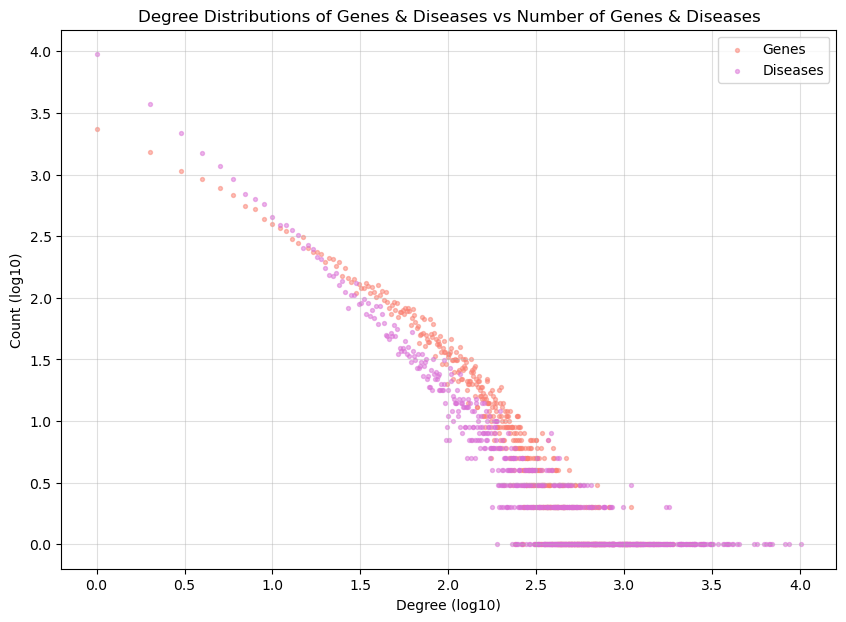

In [11]:
# Plot the degree distributions 
plt.figure(figsize=(10, 7))
plt.scatter(np.log10(df_g_degree['degree_gene']), np.log10(df_g_degree['g_association']), 
            s=8, label='Genes', color='salmon', alpha=0.5)
plt.scatter(np.log10(df_d_degree['degree_disease']), np.log10(df_d_degree['d_association']), 
            s=8, label='Diseases', color='orchid', alpha = 0.5)

# label the plot 
plt.xlabel('Degree (log10)')
plt.ylabel('Count (log10)')
plt.title('Degree Distributions of Genes & Diseases vs Number of Genes & Diseases')
plt.legend()
plt.grid(alpha=0.4)
plt.show()

## Question 4
- identify the 300+ genes strongly associated w/ Alzhemier's Disease
    - EI >= 0.667
    - num of publications >= 11

In [12]:
# write query
q4 = """select gene_symbol, num_pubs, EI
        from disgenet 
        where disease_name LIKE "Alzheimer's Disease"
        and EI >= 0.667 and num_pubs >= 11
        group by gene_symbol
        order by num_pubs desc"""

# connect & show df (top 10)
df_alz = pd.read_sql_query(q4, con)
df_alz.head(10)

,gene_symbol,num_pubs,EI
0,APOE,3088,0.9461
1,APP,2615,0.9810
2,MAPT,1003,0.9900
3,PSEN1,703,0.9707
4,BACE1,490,0.9852
5,ACHE,390,0.9845
6,BCHE,348,0.9621
7,CSF2,294,0.9660
8,LAMC2,289,0.9654
9,BDNF,242,0.9582


## Question 5
- plot Disease Pllleiotrophy Index (DPI) vs Disease Specificity Index (DSI)

In [13]:
# write query 
q5 = """select gene_symbol, num_pubs, EI, DSI, DPI
    from disgenet 
    where disease_name LIKE "Alzheimer's Disease"
    and EI >= 0.667 and num_pubs >= 11
    group by gene_symbol
    order by num_pubs desc"""

# connect & show df
df_plot = pd.read_sql_query(q5, con)
df_plot

,gene_symbol,num_pubs,EI,DSI,DPI
0,APOE,3088,0.9461,0.338,0.962
1,APP,2615,0.9810,0.422,0.846
2,MAPT,1003,0.9900,0.445,0.923
3,PSEN1,703,0.9707,0.469,0.846
4,BACE1,490,0.9852,0.559,0.769
...,...,...,...,...,...
309,CDCA5,11,1.0000,0.563,0.808
310,CD36,11,1.0000,0.446,0.846
311,CD14,11,0.7273,0.392,0.885
312,CALB1,11,1.0000,0.606,0.615


In [14]:
# find the gene_symbol w/ greatest DSI (top 5)
df_plot.sort_values(by='DSI', ascending=False).head(5)

,gene_symbol,num_pubs,EI,DSI,DPI
120,CALHM1,24,0.8261,0.769,0.269
230,BACE1-AS,14,1.0000,0.760,0.385
236,TAS2R62P,13,0.9231,0.729,0.192
181,APBB1,18,0.9444,0.722,0.346
293,MS4A4A,11,1.0000,0.722,0.308


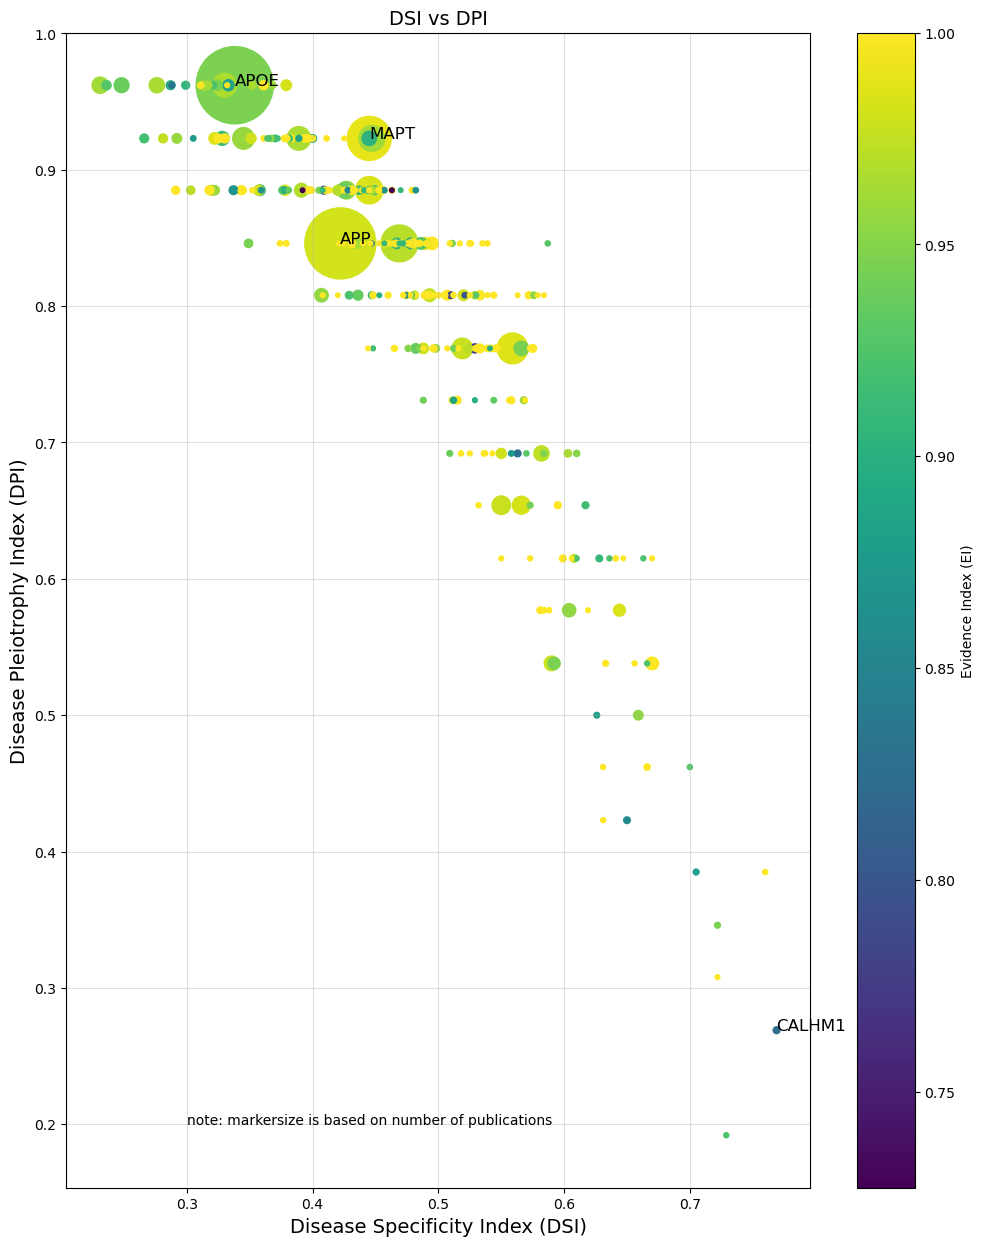

In [15]:
# plot the scatter plot
plt.figure(figsize=(12, 15))
plot = plt.scatter(df_plot.DSI, df_plot.DPI, c=df_plot['EI'], 
                   s=df_plot.num_pubs, cmap='viridis')

# plot text based on DSI & DPI shown in dataframe
plt.text(0.338, 0.962, 'APOE', fontsize=12)
plt.text(0.422, 0.846, 'APP', fontsize=12)
plt.text(0.445, 0.923, 'MAPT', fontsize=12)
plt.text(0.769, 0.269, 'CALHM1', fontsize=12)
# add note for the marker size
plt.text(0.3, 0.2, "note: markersize is based on number of publications")

# label
plt.xlabel('Disease Specificity Index (DSI)', fontsize=14)
plt.ylabel('Disease Pleiotrophy Index (DPI)', fontsize=14)
plt.colorbar(plot, label='Evidence Index (EI)')
plt.title('DSI vs DPI', fontsize=14)
plt.grid(alpha=0.4)
plt.show()

## Question 6
- what biological processes are these Alzheimer's linked genes most frequently in?

In [16]:
# write query
q6 = """select distinct go_id, count(go_id) as n_gene, qualifier, go_term
        from go_human 
        where gene_id in
        (select gene_id
        from disgenet
        where disease_name LIKE "Alzheimer's Disease" and EI >= 0.667 and num_pubs >= 11)
        and category = 'Process'
        group by go_id
        order by n_gene desc"""

# connect & show df (top 10)
df_go = pd.read_sql_query(q6, con)
df_go.head(10)

,go_id,n_gene,qualifier,go_term
0,GO:0010628,85,involved_in,positive regulation of gene expression
1,GO:0045944,76,involved_in,positive regulation of transcription by RNA po...
2,GO:0006468,58,involved_in,protein phosphorylation
3,GO:0007165,55,involved_in,signal transduction
4,GO:0043066,50,involved_in,negative regulation of apoptotic process
5,GO:0010629,46,acts_upstream_of_or_within,negative regulation of gene expression
6,GO:0008284,46,involved_in,positive regulation of cell population prolife...
7,GO:0045893,43,involved_in,positive regulation of DNA-templated transcrip...
8,GO:0000122,43,involved_in,negative regulation of transcription by RNA po...
9,GO:0006954,40,involved_in,inflammatory response


## Question 7
- what other diseases these genes are associated with
    - EI >= 0.667
    - num_pub >= 11

In [17]:
# write query
q7 = """select gene_symbol, num_pubs, EI, disease_name, count(gene_symbol) as n_alz
        from disgenet 
        where gene_symbol in (select gene_symbol
            from disgenet 
            where disease_name LIKE "Alzheimer's Disease"
            and EI >= 0.667 and num_pubs >= 11
            group by gene_symbol)
        and disease_type != 'group' and EI >= 0.667 and num_pubs >= 11
        group by disease_name
        order by n_alz desc
        limit 10"""

# connect & show df
df_other = pd.read_sql_query(q7, con)
df_other

,gene_symbol,num_pubs,EI,disease_name,n_alz
0,A2M,43,0.7692,Alzheimer's Disease,314
1,ACTB,67,1.0000,Malignant neoplasm of breast,124
2,ACTB,65,1.0000,Breast Carcinoma,123
3,ACTB,125,1.0000,Neoplasm Metastasis,109
4,ACTB,297,0.9865,Tumor Cell Invasion,101
5,ACTB,36,0.9722,Liver carcinoma,97
6,ACTB,37,1.0000,Carcinogenesis,95
7,ACHE,18,1.0000,Parkinson Disease,81
8,ABCA1,138,0.9923,Atherosclerosis,78
9,ABCA1,28,0.9259,"Diabetes Mellitus, Non-Insulin-Dependent",77


## Question 8
- visualize Alzheimer’s genes and the top-10 Alzheimer’s-related diseases as a graph using the NetworkX library

In [18]:
# to be used later in query
# save question 4 query as a new table on dbeaver
t4 = """create table alz_gene as
        select gene_symbol, num_pubs, EI
        from disgenet 
        where disease_name LIKE "Alzheimer's Disease"
        and EI >= 0.667 and num_pubs >= 11
        group by gene_symbol
        order by num_pubs desc"""

# save question 7 query as a new table on dbeaver
t7 = """create table top_alz as
        select gene_symbol, num_pubs, EI, disease_name, count(gene_symbol) as n_alz
        from disgenet 
        where gene_symbol in (select gene_symbol
            from disgenet 
            where disease_name LIKE "Alzheimer's Disease"
            and EI >= 0.667 and num_pubs >= 11
            group by gene_symbol)
        and disease_type != 'group' and EI >= 0.667 and num_pubs >= 11
        group by disease_name
        order by n_alz desc
        limit 10"""

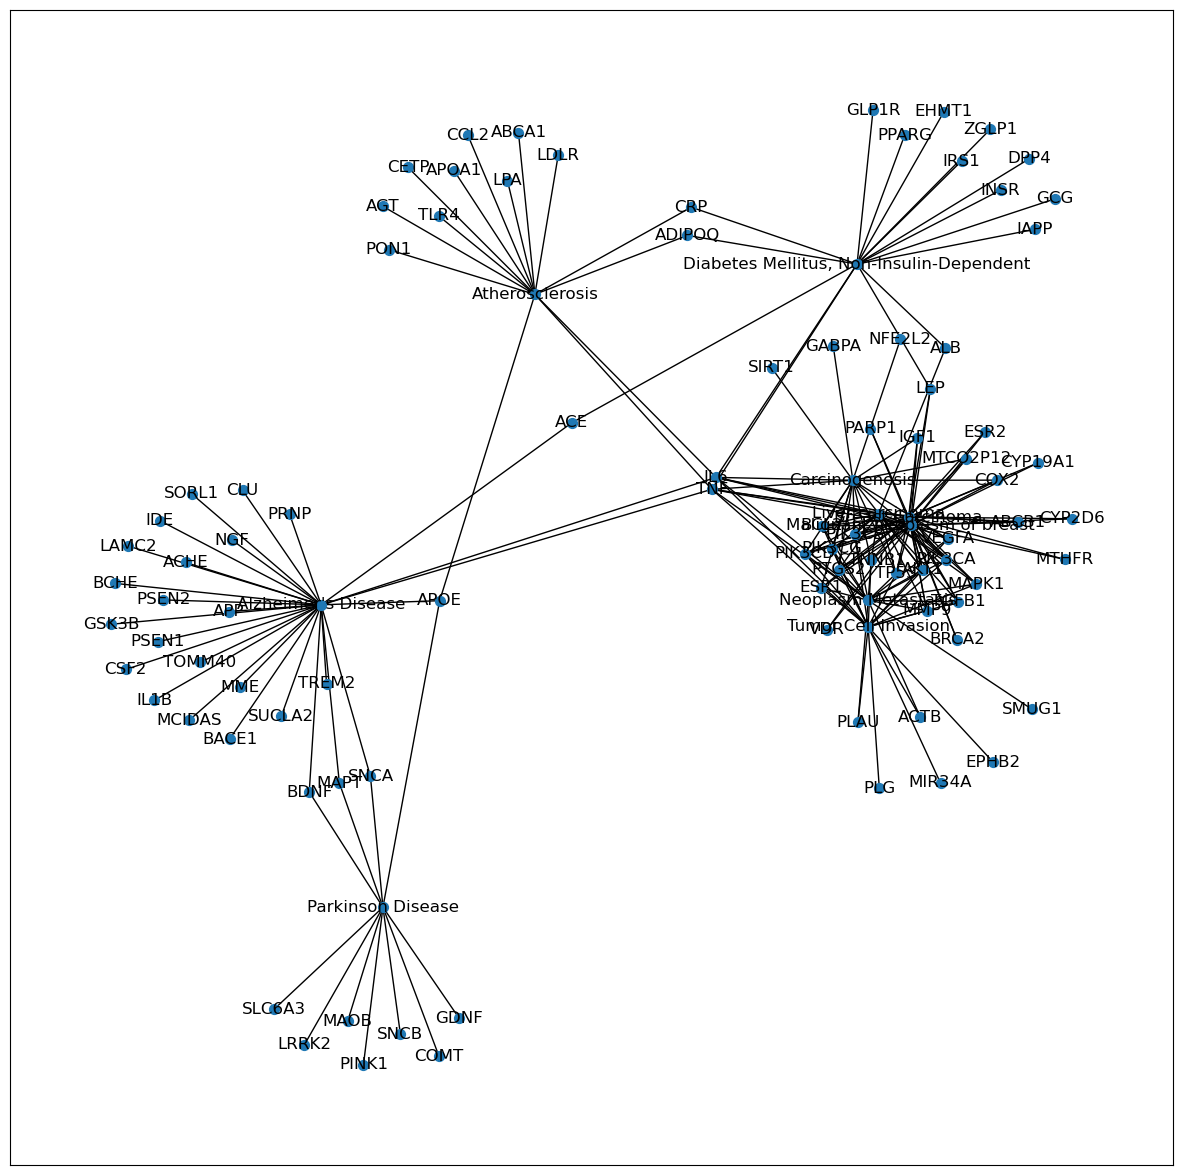

In [23]:
# write query for alzhelmer's genes
q_8 = """select gene_symbol, num_pubs, disease_name
         from disgenet 
         where gene_symbol in (select gene_symbol from alz_gene)
         and disease_name in (select disease_name from top_alz) 
         order by num_pubs desc
         limit 200"""

# connect 
net = pd.read_sql_query(q_8, con)

# plot networkx & label the chart - given
plt.figure(figsize=(15,15), dpi=100)
G = nx.from_pandas_edgelist(net, 'gene_symbol', 'disease_name', 
                            create_using=nx.Graph()) 
nx.draw_networkx(G, with_labels=True, node_size=50)

## Research
Question: Identify the top 300 genes with the highest number of total publications, and find the relationship between the DPI, DSI, and the number of publications of the gene.

Conclusion: Based on the scatterplot, the gene with the highest DPI and the lowest DSI has more publications than genes with the lowest DSI and DPI. Furthermore, the size of the plot is based on the number of unique diseases that is associated with each gene (scaled by 1/50). It demonstrated that a higher DPI would associate to more diseases related to the gene, which may correlate to an increase in the number of publications.


In [24]:
# write query
# n_disease = count of unique diseases associated with each gene
research_q = """select sum(num_pubs) as total_pub, gene_name, gene_symbol, disease_name, DSI, DPI, EI, count(distinct disease_name) as n_disease
            from disgenet 
            group by gene_symbol
            order by total_pub desc
            limit 300"""

# connect & show df
research = pd.read_sql_query(research_q, con)
research


,total_pub,gene_name,gene_symbol,disease_name,DSI,DPI,EI,n_disease
0,49257,tumor protein p53,TP53,5q-syndrome,0.236,0.962,1.0,2494
1,30435,epidermal growth factor receptor,EGFR,ACTH-Secreting Pituitary Adenoma,0.295,0.885,1.0,1394
2,26071,erb-b2 receptor tyrosine kinase 2,ERBB2,ANOPHTHALMIA AND PULMONARY HYPOPLASIA,0.328,0.923,1.0,995
3,21889,tumor necrosis factor,TNF,(non-specific) purulent meningitis,0.231,0.962,1.0,2724
4,18868,BRCA1 DNA repair associated,BRCA1,ANOPHTHALMIA AND PULMONARY HYPOPLASIA,0.367,0.923,0.9091,747
...,...,...,...,...,...,...,...,...
295,1620,lipocalin 2,LCN2,ADHF,0.405,0.885,1.0,497
296,1617,hepcidin antimicrobial peptide,HAMP,Abnormality of endocrine pancreas physiology,0.433,0.846,,377
297,1613,nuclear factor kappa B subunit 1,NFKB1,AIDS related complex,0.396,0.923,0.0,551
298,1611,retinoid isomerohydrolase RPE65,RPE65,"ACTH Deficiency, Isolated",0.417,0.808,1.0,431


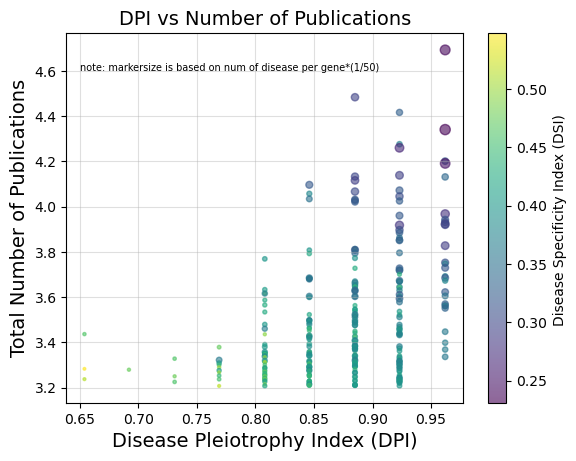

In [25]:
# plot a scatter plot
r_scat = plt.scatter(research.DPI, np.log10(research.total_pub), c=research.DSI, 
                   s=research.n_disease/50, alpha=0.6, cmap='viridis')
plt.text (0.65, 4.6, "note: markersize is based on num of disease per gene*(1/50)", fontsize=7)

# label the plots & add in legend
plt.xlabel('Disease Pleiotrophy Index (DPI)', fontsize=14)
plt.ylabel('Total Number of Publications', fontsize=14)
plt.colorbar(r_scat, label='Disease Specificity Index (DSI) ')
plt.title('DPI vs Number of Publications', fontsize=14)
plt.grid(alpha=0.4)
plt.show()